# EDA of Xarray

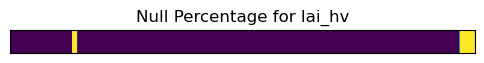

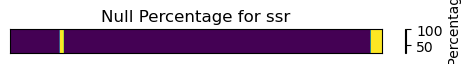

In [20]:

import sys 
sys.path.append("C:/Users/isxzl/OneDrive/Code/AutoGeo")
from sample.eda import plot_null_percentage
import xarray as xr

grib_path = r"C:\Datasets\Zhejiang20-23RS\ERA5_featureRanking1\2022_Jan_2_Mar.nc" 
dataset = xr.open_dataset(grib_path)
#plot_null_percentage([dataset["lai_hv"],dataset["ssr"]], dim=['time'])
plot_null_percentage([dataset["lai_hv"],dataset["ssr"]], dim=['longitude',"latitude"])


In [ ]:
dataset["lai_hv"].isnull().sel(time="2022-02-04T15:00:00", method="nearest").plot(x="longitude",y="latitude")

# EDA of China

Given: 
- shp of China, Zhejiang
- df of site.

Wanted:
- plot china, roi, and nai.

## World, China, Zhejiang Boundary

C:\Users\isxzl\AppData\Local\Temp\ipykernel_23608\390883462.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


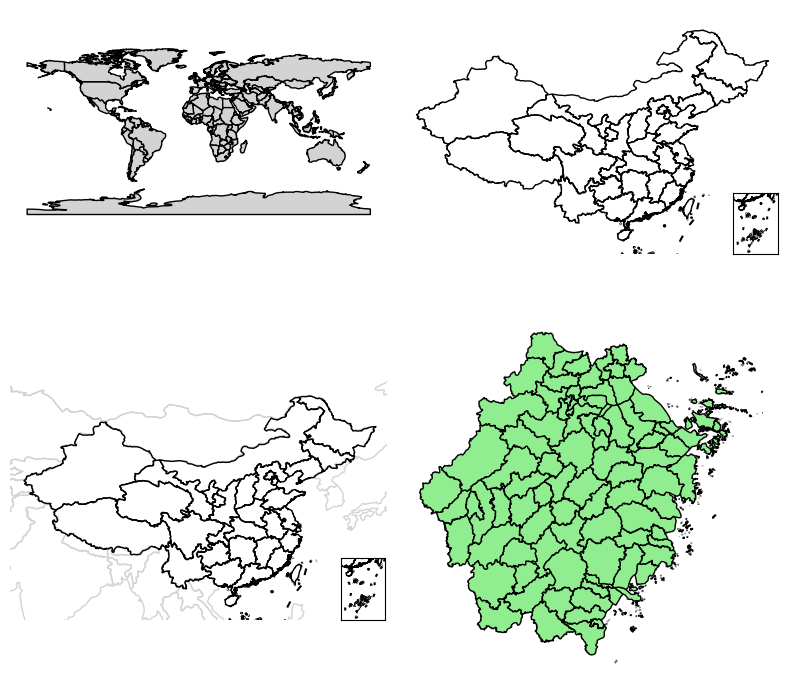

In [2]:
import sys 
sys.path.append("C:/Users/isxzl/OneDrive/Code/AutoGeo")
from sample.eda import get_zhejiang, get_china, get_world
import matplotlib.pyplot as plt
import geopandas as gpd
country1 = gpd.read_file(r'C:\Datasets\Zhejiang20-23RS\Earth/province.shp').to_crs('EPSG:4326')
# Plotting the 2x2 subplot with the functions
fig, axs = plt.subplots(2, 2, figsize=(8, 8))



# World map
get_world(axs[0, 0], color='lightgray', edgecolor='black')
# China map
get_china(axs[0, 1])
# China plus World map
get_china(get_world(axs[1, 0], color='none', edgecolor='lightgray'))
# Zhejiang map
get_zhejiang(axs[1, 1], color='lightgreen', edgecolor='black')



plt.tight_layout()
plt.show()


## China Map _ 9 LINE

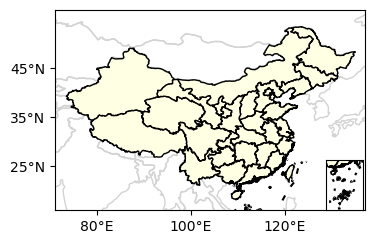

In [9]:
import sys 
sys.path.append("C:/Users/isxzl/OneDrive/Code/AutoGeo")
from sample.eda import get_zhejiang, get_china, get_world
import matplotlib.pyplot as plt


# Example usage
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=get_china(get_world(ax, color='none', edgecolor='lightgray'),color='#FFFFE4')

# Adding x and y ticks with 10 degrees resolution for the main map
ax.set_xticks(range(80, 130, 20))
ax.set_yticks(range(25, 55, 10))
ax.set_xticklabels([f"{x}°E" for x in range(80, 130, 20)])
ax.set_yticklabels([f"{y}°N" for y in range(25, 55, 10)])



ax.axis('on')  # You might want to keep the axis on to see the ticks
plt.show()


## Study Area: Zhejiang

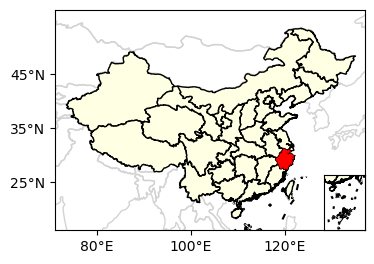

In [3]:
import sys 
sys.path.append("C:/Users/isxzl/OneDrive/Code/AutoGeo")
from sample.eda import get_zhejiang, get_china, get_world


# Example usage
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=get_china(get_world(ax, color='none', edgecolor='lightgray'),color='#FFFFE4')

# Adding x and y ticks with 10 degrees resolution for the main map
ax.set_xticks(range(80, 130, 20))
ax.set_yticks(range(25, 55, 10))
ax.set_xticklabels([f"{x}°E" for x in range(80, 130, 20)])
ax.set_yticklabels([f"{y}°N" for y in range(25, 55, 10)])



# Highlight Zhejiang
country1 = gpd.read_file(r'C:\Datasets\Zhejiang20-23RS\Earth/province.shp').to_crs('EPSG:4326')
country1[country1["NAME"] =="浙江"].plot(ax=ax, color="red")

ax.axis('on')  # You might want to keep the axis on to see the ticks
plt.show()
 

##  Concentration Year Average Map

In [5]:
import sys 
sys.path.append("C:/Users/isxzl/OneDrive/Code/AutoGeo")
from sample.dataset import filter_dataframe_by_date

# Assuming you've already read the CSV and selected specific columns
csv_path = r'C:\Datasets\Zhejiang20-23RS\merged_coor.csv'
start_date = '2022-01-03'
end_date = '2022-01-03'

df=filter_dataframe_by_date(csv_path,start_date,end_date)


csv_pseudo_pkl = r'C:\Datasets\Zhejiang20-23RS\merged_coor_pseudo.pkl'
df = pd.read_pickle(csv_pseudo_pkl) #to load 123.pkl back to the dataframe df
df[df["time"]=="2022-02-01 04:00:00"]



df = df.groupby(['Site_number', 'longitude', 'latitude'])['Negative_oxygen_ions'].mean().reset_index()
df.rename(columns={'Negative_oxygen_ions': 'average_Negative_oxygen_ions'}, inplace=True)

,Site_number,Site_name,time,longitude,latitude,Negative_oxygen_ions,deg0l,zust,ewss,i10fg,...,swvl2,stl1,swvl3,stl2,lshf,stl3,stl4,lblt,srtm,LC_Type4
728,0,PseudoPoints,2022-02-01 04:00:00,119.164662,30.136014,595.014198,665.76500,0.206694,-807.490156,6.774634,...,0.488297,277.927368,0.459915,278.740234,0.650001,282.781372,288.248779,280.421631,111.00,2.0
2752,58448,临安气象站,2022-02-01 04:00:00,119.700000,30.210000,210.000000,358.41500,0.251416,-803.850156,8.151001,...,0.491714,277.423462,0.471512,277.469727,0.650001,281.059692,286.799561,276.765869,63.25,8.0
4603,58450,湖州气象站,2022-02-01 04:00:00,120.050000,30.860000,280.000000,470.56000,0.203889,-369.850156,6.331430,...,0.381855,278.828247,0.311417,278.126465,0.650001,281.079712,286.156982,277.152588,3.25,8.0
7374,58452,嘉兴气象站,2022-02-01 04:00:00,120.760000,30.730000,370.000000,572.86250,0.238281,-441.410156,7.405786,...,0.384808,279.586060,0.327574,278.636475,0.650001,281.529175,286.592041,277.546570,6.50,8.0
9364,58455,海宁气象站,2022-02-01 04:00:00,120.650000,30.510000,460.000000,563.20000,0.260681,-441.010156,8.007055,...,0.395973,279.751587,0.384293,279.011719,0.650001,281.827271,287.011475,278.120605,7.50,8.0
11307,58456,桐乡气象站,2022-02-01 04:00:00,120.510000,30.630000,650.000000,537.43750,0.260516,-486.410156,7.746509,...,0.388149,279.881470,0.337173,278.907227,0.650001,281.602173,286.640869,279.291748,8.75,1.0
13168,58457,杭州气象站,2022-02-01 04:00:00,120.160000,30.230000,600.000000,479.52750,0.292507,-548.270156,8.578403,...,0.487558,278.879028,0.470478,278.497803,0.650001,281.828247,287.480225,277.616699,21.75,4.0
15179,58458,海盐气象站,2022-02-01 04:00:00,120.900000,30.530000,780.000000,604.13500,0.214479,-232.610156,7.457739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,6.0
17165,58459,萧山气象站,2022-02-01 04:00:00,120.280000,30.180000,400.000000,511.93250,0.300451,-528.210156,8.666382,...,0.391018,278.982544,0.363095,278.419678,0.650001,281.453979,286.839111,277.404968,56.75,8.0
19144,58464,平湖气象站,2022-02-01 04:00:00,121.110000,30.650000,550.000000,631.12000,0.245378,-320.410156,7.929907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.75,5.0


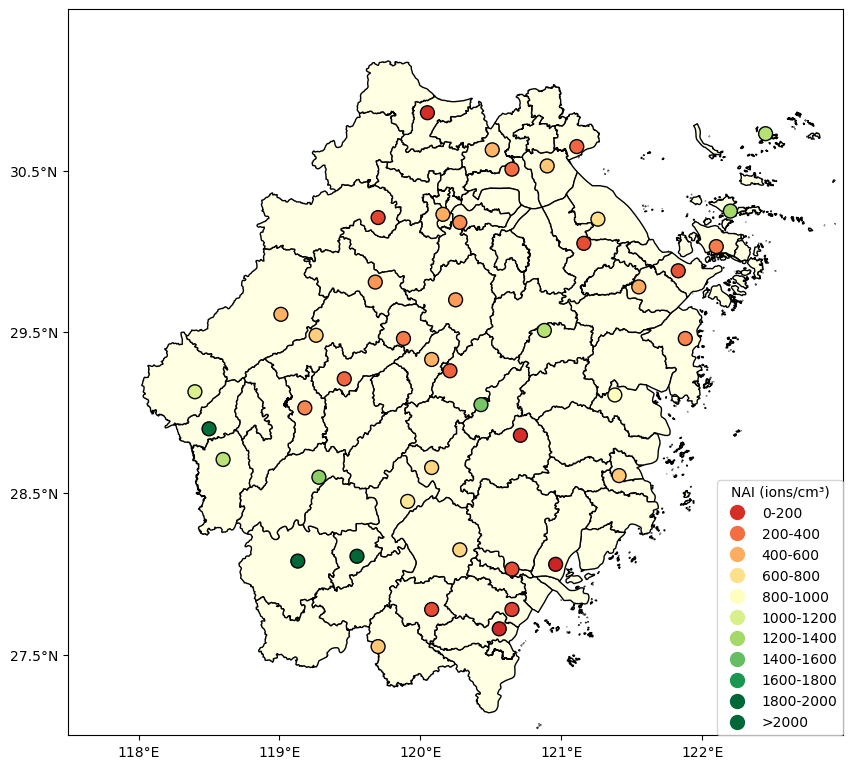

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.lines as mlines
import sys 
sys.path.append("C:/Users/isxzl/OneDrive/Code/AutoGeo")
from sample.eda import get_zhejiang, get_china, get_world


# 1. Plot the Zhejiang map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = get_zhejiang(ax, color='#FFFFE4', edgecolor='black')


# Normalize the average_Negative_oxygen_ions for color mapping
norm = plt.Normalize(0, 2000)
cmap = plt.cm.RdYlGn  # Red to Green colormap
scatter = ax.scatter(df['longitude'], df['latitude'], c=df['average_Negative_oxygen_ions'], cmap=cmap, norm=norm, edgecolor='k', s=100)

# Create intervals and labels
intervals = np.arange(0, 2200, 200)  # Extending to 2200 to include ">2000" as a separate category
labels = [f"{i}-{i+200}" for i in intervals[:-1]] + ['>2000']

# Create legend handles
legend_handles = []
for i, label in enumerate(labels):
    # Use the midpoint of each interval for color mapping, cap at 2000 for the ">2000" category
    value = min(i * 200 + 200, 2000)
    color = cmap(norm(value))
    dot = mlines.Line2D([], [], color=color, marker='o', linestyle='None', markersize=10, label=label)
    legend_handles.append(dot)

# Add custom legend to the plot
legend_title = "NAI (ions/cm³)"
plt.legend(handles=legend_handles, title=legend_title, loc='lower right', borderaxespad=0.)


# Adding x and y ticks with 10 degrees resolution for the main map
ax.set_xlim([117.5, 123])
ax.set_ylim([27, 31.5])
xrange=np.arange(118, 123, 1)
yr=np.arange(27.5, 31.5, 1)
ax.set_xticks(xrange)
ax.set_yticks(yr)
ax.set_xticklabels([f"{x}°E" for x in xrange])
ax.set_yticklabels([f"{y}°N" for y in yr])

ax.axis('on')
plt.show()



# Site Distribution

In [3]:
import sys 
sys.path.append("C:/Users/isxzl/OneDrive/Code/AutoGeo")
from sample.dataset import filter_dataframe_by_date
sys.path.append("C:/Users/isxzl/OneDrive/Code/FeatureInsight")
from FeatureInsight import struct_Investigation,univar_dis,bivar_dis,clean_ds


# Assuming you've already read the CSV and selected specific columns
csv_path = r'C:\Datasets\Zhejiang20-23RS\merged_coor.csv'
start_date = '2021-10-01'
end_date = '2021-10-20'

df=filter_dataframe_by_date(csv_path,start_date,end_date)




Total data number: 20125
Unique site count: 58


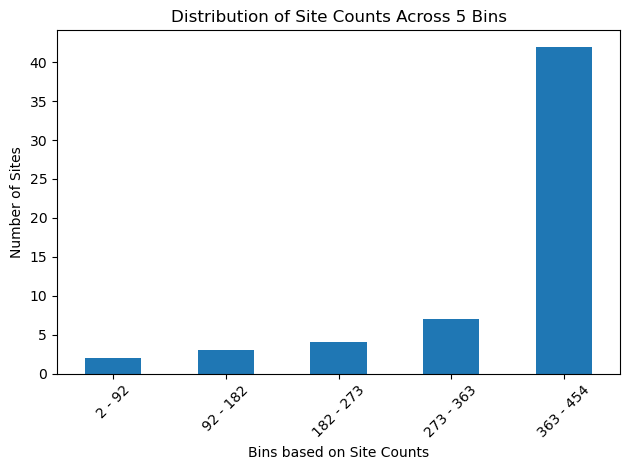

3 Sites with minimal counts:
Site_name
宁海气象站      2
石浦气象站     19
瑞安气象站    106
Name: count, dtype: int64
Site with maximal count: 诸暨气象站, Percentage of total: 2.26%


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and it includes a 'Site_name' column

# Print total data number and unique site count
total_data_count = len(df)
unique_site_count = df['Site_name'].nunique()
print(f"Total data number: {total_data_count}")
print(f"Unique site count: {unique_site_count}")

# Calculate site count for each site
site_counts = df['Site_name'].value_counts()

# Create 5 bins for site counts from min to max
bins = np.linspace(site_counts.min(), site_counts.max(), 6)
site_count_bins = pd.cut(site_counts, bins, include_lowest=True, labels=None)
bin_counts = site_count_bins.value_counts().sort_index()

# Generate labels for the bins based on the bin edges
bin_labels = [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)]

# Plot distribution of site counts across bins with custom x-axis labels
bin_counts.plot(kind='bar')
plt.xlabel('Bins based on Site Counts')
plt.ylabel('Number of Sites')
plt.title('Distribution of Site Counts Across 5 Bins')
plt.xticks(ticks=np.arange(len(bin_labels)), labels=bin_labels, rotation=45)
plt.tight_layout()
plt.show()

# Print the 3 sites with minimal counts and their counts
print("3 Sites with minimal counts:")
print(site_counts.nsmallest(3))

# Print the site name with maximal count and its percentage of total
max_site_name = site_counts.idxmax()
max_site_percentage = (site_counts.max() / total_data_count) * 100
print(f"Site with maximal count: {max_site_name}, Percentage of total: {max_site_percentage:.2f}%")


# Structure EDA of Feature

Given:
- df

Wanted:
- Feature Engine
- Important List

## Code

In [21]:
from sklearn.preprocessing import StandardScaler
from feature_engine.imputation import MeanMedianImputer
from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.wrappers import SklearnTransformerWrapper
sys.path.append("C:/Users/isxzl/OneDrive/Code/FeatureInsight")
from FeatureInsight import struct_Investigation,univar_dis,bivar_dis,clean_ds


csv_pkl = r'C:\Datasets\Zhejiang20-23RS\merged_coor.pkl'
df = pd.read_pickle(csv_pkl) #to load 123.pkl back to the dataframe df

# df=MeanMedianImputer(imputation_method='median').fit_transform(df)
# df=DatetimeFeatures(variables=["Datetime"],features_to_extract = ["month", "day_of_month","hour"],drop_original=True).fit_transform(df)
# df= Winsorizer(variables=["Negative_oxygen_ions"],capping_method='mad', tail='both', fold=7).fit_transform(df)
# df=SklearnTransformerWrapper(StandardScaler()).fit_transform(df) 

df=clean_ds(df)

summary=struct_Investigation(df)  
summary

C:\Users/isxzl/OneDrive/Code/FeatureInsight\FeatureInsight\structure_Investigation.py:55: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.img_list=[]


There are 26500 instances, 130 cols in total


 13%|██████████                                                                      | 17/135 [00:00<00:00, 169.50it/s]C:\Users/isxzl/OneDrive/Code/FeatureInsight\FeatureInsight\structure_Investigation.py:87: RuntimeWarning: invalid value encountered in scalar divide
  if df[fea].nunique()/df[fea].count()<0.1 or df[fea].count()<100:
C:\Users/isxzl/OneDrive/Code/FeatureInsight\FeatureInsight\structure_Investigation.py:96: RuntimeWarning: invalid value encountered in scalar divide
  info.loc[fea,"Unique Count"]= str(df[fea].nunique())+ "({p:.2f}%) of total".format(p=df[fea].nunique()/df[fea].count()*100)
100%|███████████████████████████████████████████████████████████████████████████████| 135/135 [00:00<00:00, 206.84it/s]


,dtype,measure_scales,Unique Count,Null Count,thumbnail
variable,,,,,
Site_number,int64,Categorical Data,60(0.23%) of total,0(0.0%),"[58546, 58452, 58548]"
Site_name,{'str'},Categorical Data,60(0.23%) of total,0(0.0%),"['武义气象站', '常山气象站', '义乌气象站']"
time,datetime64[ns],Categorical Data,503(1.90%) of total,0(0.0%),"[Timestamp('2022-01-07 00:00:00'), Timestamp('..."
Negative_oxygen_ions,float64,Categorical Data,1015(3.83%) of total,0(0.0%),"[2458.0, 2240.0, 350.0]"
longitude,float64,Categorical Data,54(0.20%) of total,0(0.0%),"[120.08, 120.76, 120.88]"
...,...,...,...,...,...
stl3,float64,numerical Data,21363(95.95%) of total,4235(15.981132075471699%),"[281.2562255859366, 286.42712402343636, 281.23..."
stl4,float64,numerical Data,21326(95.78%) of total,4235(15.981132075471699%),"[288.192626953125, nan, 285.6748046875007]"
lblt,float64,numerical Data,20683(92.89%) of total,4235(15.981132075471699%),"[279.6188964843761, 281.16833496093693, 278.65..."


Other features:  []


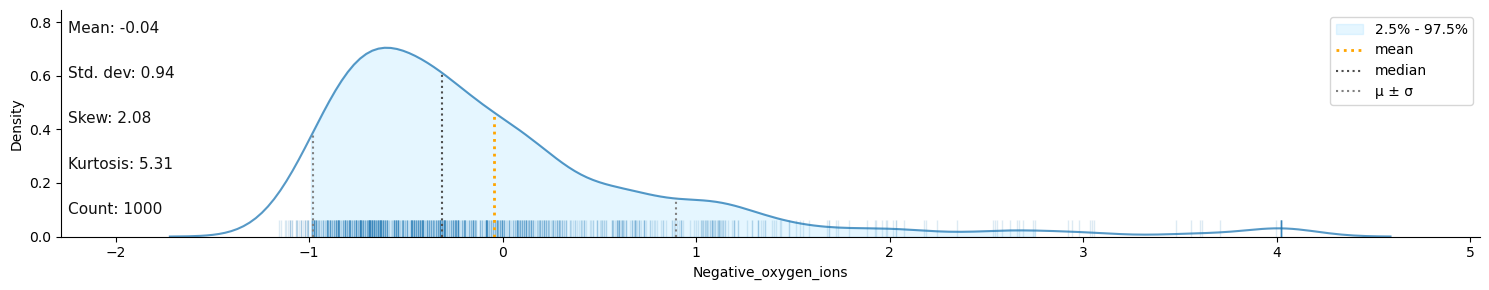

In [3]:
univar_dis(df.sample(1000),["Negative_oxygen_ions"])

# Corase Correlation Analysis [100+ Varible]

Given:
- df

Wanted:
- corr matrix
- shape figure
- Important List

#### Code

In [2]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import xarray as xr
from sklearn.preprocessing import StandardScaler
from feature_engine.imputation import MeanMedianImputer
from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.selection import DropConstantFeatures
from sklearn.model_selection import train_test_split 
from scipy.stats import pearsonr
import shap
import sys
import pandas as pd
sys.path.append("C:/Users/isxzl/OneDrive/Code/FeatureInsight")
from FeatureInsight import struct_Investigation,univar_dis,bivar_dis,clean_ds

grib_file_path=r"C:\Datasets\Zhejiang20-23RS\ERA5_featureRanking1\2022_Jan_2_Mar.nc"
csv_pkl = r'C:\Datasets\Zhejiang20-23RS\merged_coor_pseudo_4h.pkl'



df = pd.read_pickle(csv_pkl) #to load 123.pkl back to the dataframe df

df=clean_ds(df)

df= DropConstantFeatures(missing_values="include").fit_transform(df)
df=MeanMedianImputer(imputation_method='median').fit_transform(df)
#df=DatetimeFeatures(variables=["time"],features_to_extract = ["month", "day_of_month","hour"],drop_original=True).fit_transform(df)
#df= Winsorizer(variables=["Negative_oxygen_ions"],capping_method='mad', tail='both', fold=7).fit_transform(df)
df=SklearnTransformerWrapper(StandardScaler()).fit_transform(df) 



#X=X[union_features]
X = df.drop(['Negative_oxygen_ions',"Site_name","Site_number",'longitude','latitude','time'], axis=1)
y = df['Negative_oxygen_ions']
 

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
import pandas as pd
from feature_engine.selection import RecursiveFeatureElimination
from sklearn.linear_model import LinearRegression

print("Training Recursive")
rfe = RecursiveFeatureElimination(LGBMRegressor(random_state=42),scoring="r2", cv=2)
rfe.fit_transform(X, y)

Training Recursive


Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\isxzl\anaconda3\envs\EO\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\isxzl\anaconda3\envs\EO\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\isxzl\anaconda3\envs\EO\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "C:\Users\isxzl\anaconda3\envs\EO\lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: character maps to <undefined>
Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "C:\Users\isxzl\anaconda3\envs\EO\lib\site-packages\joblib\ext

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30595
[LightGBM] [Info] Number of data points in the train set: 20205, number of used features: 123
[LightGBM] [Info] Start training from score -0.011355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28984
[LightGBM] [Info] Number of data points in the train set: 20206, number of used features: 123
[LightGBM] [Info] Start training from score 0.011354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30595
[LightGBM] [Info] Number of data points in the train set: 20205, number of used features: 123
[LightGBM] [Info] St

,deg0l,zust,bld,nsss,lgws,tsn,cape,vimae,inss,tcw,...,sf,t2m,sshf,sro,skt,asn,swvl4,stl1,stl2,stl3
0,-0.816039,-1.181599,-0.790119,0.372093,0.255028,0.202232,-0.181258,0.674139,0.380538,-0.387269,...,-0.136798,-0.981294,-0.475344,-0.277992,-1.108882,-0.687547,-0.259926,-1.414668,-1.346095,-0.158874
4,-0.904951,-0.870424,-0.734291,0.515769,0.462167,0.206965,-0.176114,0.798721,0.515123,-0.416833,...,-0.136798,-0.237113,0.934690,-0.278323,0.021756,-0.747323,-0.260699,-0.589477,-1.225252,-0.183832
8,-0.904302,-1.318192,-0.743587,0.388398,0.403326,0.206776,-0.183482,0.910338,0.304264,-0.434592,...,-0.136798,0.199812,0.636837,-0.278170,0.246948,-0.804655,-0.261472,-0.232200,-0.985668,-0.201873
12,-0.914691,-1.380359,-0.824401,0.302368,0.252271,-2.366400,-0.183482,0.824625,0.281882,-0.756929,...,-0.136798,-0.234626,0.731994,-0.278154,-1.005690,-0.849685,-0.261858,-0.951358,-0.912291,-0.212724
16,-0.914720,-1.305108,-0.861044,0.235751,0.649939,-4.571086,-0.183482,0.748955,0.210913,-1.018667,...,-0.136798,-1.084005,0.761809,-0.278154,-1.609896,-0.863407,-0.262245,-1.480679,-1.033961,-0.226289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166086,1.396981,0.517957,0.352399,-1.566957,1.819508,0.207060,-0.162353,-1.353014,-1.417034,-0.186547,...,-0.136798,0.283075,0.950970,-0.002577,0.276390,0.032799,0.913364,1.013501,2.148477,1.883987
166087,1.339183,0.938766,2.073909,-2.616710,4.960918,0.207060,-0.173404,-1.281388,-2.517917,-0.279810,...,-0.136798,0.081490,0.420124,0.523811,0.120883,0.032799,-1.252667,0.878056,2.024029,1.883716
166088,1.424429,1.903513,0.531978,-1.200881,1.194933,0.207060,-0.179868,-1.342774,-1.488194,0.120928,...,-0.136798,-0.269329,0.498367,6.094119,-0.172843,0.032799,-2.038604,0.414689,1.399836,1.880189
166089,1.410871,0.650422,0.309721,-1.706296,0.642002,0.207060,-0.181049,-1.263944,-1.589798,-0.100483,...,-0.136798,-0.043535,1.158748,11.796599,-0.024686,0.032799,0.854429,0.641349,1.765295,1.586114


In [4]:

print("Training LGBM")
# Define the model
model = LGBMRegressor(random_state=42)
model.fit(X, y)

print("Shap Explainer")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap_importance = np.abs(shap_values).mean(axis=0)

print("Person Correlation")
pearson_corr = X.apply(lambda x: pearsonr(x, y)[0])

print("Start Analysis")
# Combining into a DataFrame
results = pd.DataFrame({
    'Feature': X.columns,
    'PearsonCorrelation': pearson_corr,
    'SHAPValue': shap_importance,
    'FeatureImportance': rfe.feature_importances_.reindex(X.columns).values  # Ensure alignment
})

# Rank based on the absolute values of Pearson Correlation, SHAP values, and Feature Importance
results['PearsonRank'] = results['PearsonCorrelation'].abs().rank(ascending=False)
results['SHAPRank'] = results['SHAPValue'].rank(ascending=False)
results['FeatureImportanceRank'] = results['FeatureImportance'].rank(ascending=False)

# Combine ranks to get a final rank (simple average of ranks; you could weigh them differently)
results['FinalRank'] = (results['PearsonRank'] + results['SHAPRank'] + results['FeatureImportanceRank']) / 3
results['FinalRank'] = results['FinalRank'].rank(ascending=True)

# Sort by final rank to identify the most important features
results_sorted = results.sort_values(by='FinalRank')

# Save the results to a new DataFrame
results_df = results_sorted.reset_index(drop=True)

# Assuming grib_file_path is defined and points to your GRIB file
ds = xr.open_dataset(grib_file_path)
var_to_grib = {var_name: ds[var_name].attrs['GRIB_name'] for var_name in ds.variables if 'GRIB_name' in ds[var_name].attrs}
results_df['GRIB_name'] = results_df['Feature'].map(var_to_grib)

# Save results to CSV, replacing ".nc" in the path with ".csv"
results_df.to_csv(grib_file_path.replace(".nc", "_featureImportance.csv"), index=False)
print("Successfully saved")

import joblib
joblib.dump(list(results_df["Feature"]),grib_file_path.replace(".nc", "_feaList.pkl"))

Training LGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30736
[LightGBM] [Info] Number of data points in the train set: 40411, number of used features: 123
[LightGBM] [Info] Start training from score 0.000000
Shap Explainer
Person Correlation
Start Analysis


An input array is constant; the correlation coefficient is not defined.


Successfully saved


['C:\\Datasets\\Zhejiang20-23RS\\ERA5_featureRanking1\\2022_Jan_2_Mar_feaList.pkl']

['C:\\Datasets\\Zhejiang20-23RS\\ERA5_featureRanking1\\2022_Jan_2_Mar_fea.pkl']

In [41]:
import pandas as pd

threshold=10
 
# Find the indices of the 10 lowest values for each ranking column
lowest_pearson = results_df.nsmallest(threshold, 'PearsonRank').index
lowest_shap = results_df.nsmallest(threshold, 'SHAPRank').index
lowest_final = results_df.nsmallest(threshold, 'FinalRank').index
lowest_fea = results_df.nsmallest(threshold, 'FeatureImportanceRank').index

# Combine the indices, removing duplicates
combined_indices = set(lowest_pearson) | set(lowest_shap) | set(lowest_final) | set(lowest_fea)

# Filter the DataFrame to only include rows with these indices
filtered_df = results_df.loc[list(combined_indices)]
filtered_features=list(filtered_df["Feature"])
filtered_featuresname=list(filtered_df["GRIB_name"])
print(len(filtered_df))
print(filtered_featuresname)
print(filtered_features)
filtered_df
 
 

24
['Standard deviation of sub-gridscale orography', 'Forecast surface roughness', 'Angle of sub-gridscale orography', nan, 'Volumetric soil water layer 3', 'Vertical integral of mass of atmosphere', 'Lake mix-layer depth', 'Surface pressure', 'Geopotential', 'Surface short-wave (solar) radiation downwards', 'Land-sea mask', 'Total column ozone', 'Vertical integral of temperature', 'Soil temperature level 4', 'Total column vertically-integrated potential + internal energy', 'Vertical integral of potential+internal+latent energy', 'Vertical integral of eastward ozone flux', 'Anisotropy of sub-gridscale orography', 'Total column vertically-integrated enthalpy', 'Standard deviation of filtered subgrid orography (climatological)', 'Leaf area index, high vegetation', 'Slope of sub-gridscale orography', 'Surface long-wave (thermal) radiation downwards', 'Total column vertically-integrated total energy']
['sdor', 'fsr', 'anor', 'srtm', 'swvl3', 'p53.162', 'lmld', 'sp', 'z', 'ssrd', 'lsm', 'tc

,Feature,PearsonCorrelation,SHAPValue,FeatureImportance,PearsonRank,SHAPRank,FeatureImportanceRank,FinalRank,GRIB_name
0,sdor,0.295871,0.119733,67.0,6.0,2.0,2.0,1.0,Standard deviation of sub-gridscale orography
1,fsr,0.261775,0.045016,58.0,10.0,5.0,6.0,2.0,Forecast surface roughness
2,anor,-0.208860,0.034444,52.0,15.0,7.0,10.0,3.0,Angle of sub-gridscale orography
3,srtm,0.191773,0.028186,59.0,18.0,12.0,4.5,4.0,NaN
4,swvl3,0.204403,0.016734,66.5,16.0,18.0,3.0,5.0,Volumetric soil water layer 3
5,p53.162,-0.342889,0.017386,41.0,4.0,17.0,19.5,6.0,Vertical integral of mass of atmosphere
6,lmld,0.179920,0.029128,46.0,20.0,9.0,13.0,7.0,Lake mix-layer depth
7,sp,-0.280883,0.011494,49.0,7.0,24.0,12.0,8.0,Surface pressure
8,z,0.343440,0.108127,28.0,3.0,3.0,45.0,9.0,Geopotential
9,ssrd,-0.135826,0.028494,36.5,30.0,10.0,23.0,10.0,Surface short-wave (solar) radiation downwards


##  Finer Correlation Analysis [20+ Varible]
可同步观测气温（Ta）、相对湿度（RH）、风速（Ws）、大气压（AP）、光合有效辐射（PAR）、直接辐射（Dr）、紫外线（UV）等11个气象因子)、颗粒物2.5 (PM 2.5 )、净辐射 (Rn)、土壤湿度 (Ms) 和土壤温度(Ts)  https://www.sciencedirect.com/science/article/pii/S1574954121002557?via%3Dihub


SIF、叶面积指数（LAI）和总初级生产力（GPP） 气象因素包括蒸散量（ET）、气温（T）、相对湿度（RH）、风速（W）、太阳辐射通量（RS ）、水汽压差（VPD）、云量（CC）和露水点温度（DEWT）地形参数包括数字高程模型 (DEM)、坡度和坡向。 空气质量包括空气质量指数（AQI）和污染物（PM 2.5、PM 10、SO 2、NO 2、CO、O 3）浓度

温度、相对湿度、噪音、光线、风速、PM 2.5和 PM 10 。https://link.springer.com/article/10.1007/s11869-023-01458-2


光照强度（研究） https://link.springer.com/article/10.1007/s11356-023-29456-y





'Geopotential'


Vegetation
'Type of low vegetation', 
'Leaf area index high vegetation',

 Temperature and pressure
'Surface pressure', 
'Temperature of snow layer',



Vertical integrals
'Vertical integral of mass of atmosphere'
'Vertical integral of temperature'
'Total column vertically-integrated potential + internal energy'
'Time-integrated northward turbulent surface stress'
'Time-integrated eastward turbulent surface stress'
'Total column vertically-integrated total energy'



Water
'Lake mix-layer depth'
'Lake total depth'
'Lake total layer temperature'

Metero


Wind
'Instantaneous 10 metre wind gust'

Topo
'Angle of sub-gridscale orography'



'Total column vertically-integrated enthalpy'






### Code

In [51]:
import pandas as pd
import joblib
grib_file_path=r"C:\Datasets\Zhejiang20-23RS\ERA5_featureRanking1\2022_Jan_2_Mar.nc" 
csv_pkl = r'C:\Datasets\Zhejiang20-23RS\merged_coor.pkl'



finer_list= pd.read_pickle(grib_file_path.replace(".nc", "_fea.pkl"))
df = pd.read_pickle(csv_pkl) #to load 123.pkl back to the dataframe df

In [47]:
finer_list=list(fea["Feature"])[:10]+['longitude','latitude']

<Axes: title={'center': 'Feature-correlation (pearson)'}>

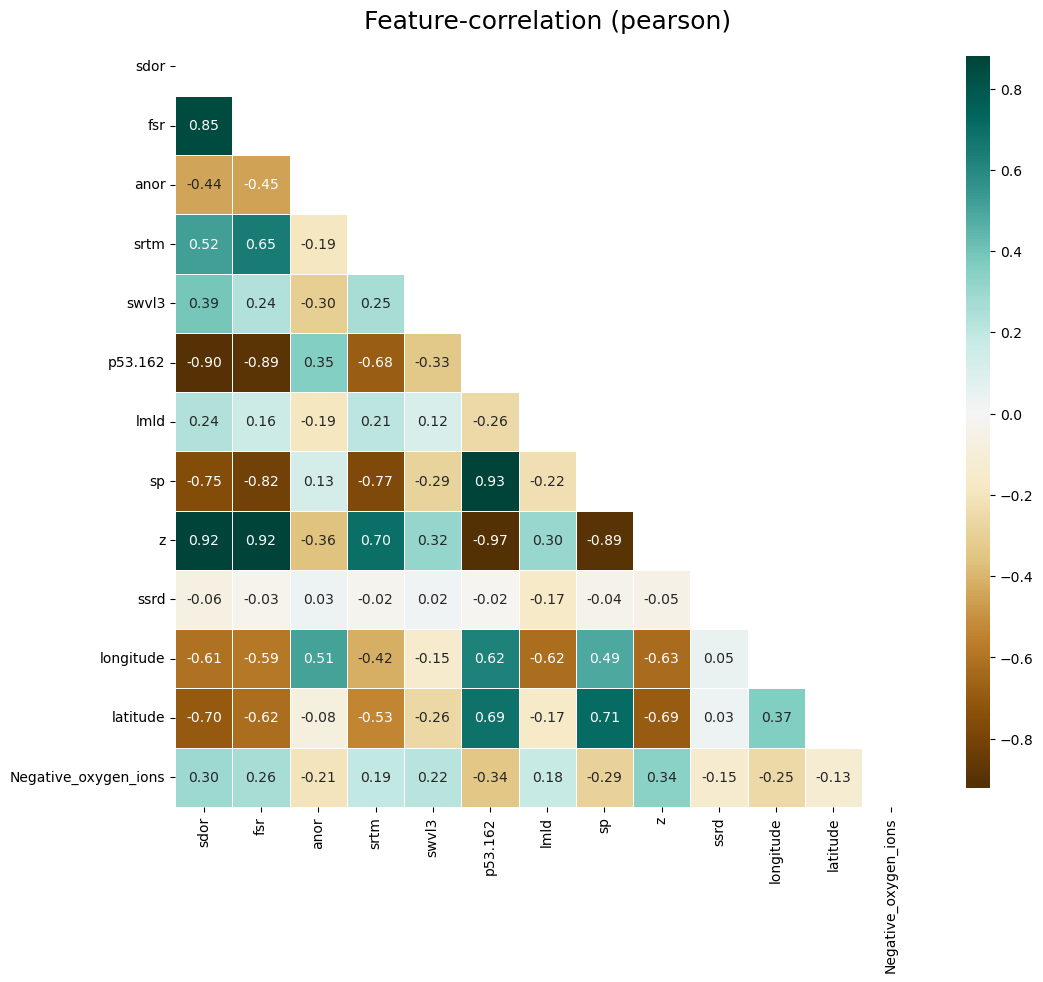

In [48]:
import klib

df_filtered=df[finer_list+["Negative_oxygen_ions"]]
klib.corr_plot(df_filtered)

 99%|===================| 26110/26500 [01:11<00:01]        

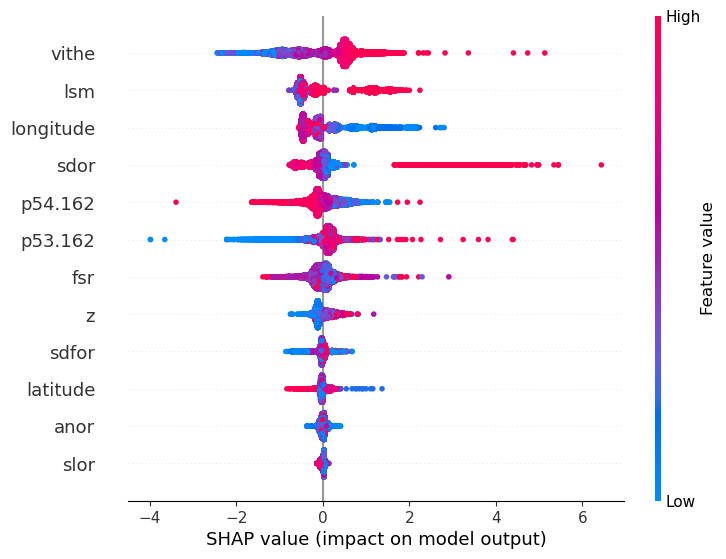

In [28]:
import xgboost
import shap


#X=X[union_features]
X_filter = df[finer_list]
y_filter = df['Negative_oxygen_ions']
#model = LGBMRegressor(random_state=42).fit(X_filter,y_filter)
model = xgboost.XGBRegressor().fit(X_filter,y_filter)
# compute SHAP values
explainer = shap.Explainer(model, X_filter)
shap_values = explainer(X_filter)
shap.plots.beeswarm(shap_values, max_display=20)
